In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
plt.rcParams["figure.figsize"] = (15,15)
pd.set_option('mode.chained_assignment', None)

In [53]:
df = pd.read_csv("moscow1.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  500000 non-null  int64  
 1   first_name          499811 non-null  object 
 2   full_name           220136 non-null  object 
 3   email               216589 non-null  object 
 4   phone_number        500000 non-null  int64  
 5   address_city        500000 non-null  object 
 6   address_street      495541 non-null  object 
 7   address_house       498939 non-null  object 
 8   address_entrance    286148 non-null  object 
 9   address_floor       287690 non-null  float64
 10  address_office      277509 non-null  object 
 11  address_comment     150078 non-null  object 
 12  location_latitude   500000 non-null  float64
 13  location_longitude  500000 non-null  float64
 14  amount_charged      500000 non-null  int64  
 15  user_id             500000 non-nul

In [54]:
df.nunique()

id                    500000
first_name            105328
full_name             127601
email                 136063
phone_number          340921
address_city            1599
address_street          5908
address_house          10842
address_entrance        2664
address_floor            217
address_office          5398
address_comment       125197
location_latitude     149063
location_longitude    154146
amount_charged          7285
user_id               347665
user_agent             41119
created_at            163502
address_doorcode       94558
dtype: int64

In [55]:
df.drop(columns=['id', 'full_name', 'email', 'phone_number', 'address_city', 'address_street', 'address_house', 'address_entrance', 
                 'address_floor', 'address_office', 'address_doorcode'], inplace = True)

## Подготовка данных для анализа

In [56]:
df

,first_name,address_comment,location_latitude,location_longitude,amount_charged,user_id,user_agent,created_at
0,Марина,NaN,55.817654,37.829648,1359,323129982,MagnitApp_Android/2.0.8,12/25/2021 22:00
1,Sergey B.,NaN,55.816030,37.808985,0,297849704,Mozilla/5.0 (iPhone; CPU iPhone OS 14_7_1 like...,9/30/2021 20:09
2,Елизавета,NaN,56.073574,37.365298,934,263040570,Mozilla/5.0 (iPhone; CPU iPhone OS 14_6 like M...,6/30/2021 20:43
3,Жанна Мкртчян,NaN,55.685777,37.544971,1104,304379733,ios(5.22.0),10/24/2021 15:35
4,Яна,"1573# код для входа во двор пешком, оставить з...",55.736684,37.687120,485,50560339,Mozilla/5.0 (Linux; Android 10; M2010J19CG Bui...,7/11/2021 10:39
...,...,...,...,...,...,...,...,...
499995,Сергей,NaN,55.818918,37.658652,383,19509504,Mozilla/5.0 (iPhone; CPU iPhone OS 14_6 like M...,7/5/2021 16:26
499996,Ivana,NaN,55.754508,37.605674,1999,23487800,Mozilla/5.0 (iPhone; CPU iPhone OS 14_4_2 like...,6/21/2021 16:40
499997,Ivana,NaN,55.754444,37.606268,1659,23487800,Mozilla/5.0 (iPhone; CPU iPhone OS 14_4_2 like...,6/29/2021 23:34
499998,Ivana,NaN,55.756741,37.605337,979,23487800,Mozilla/5.0 (iPhone; CPU iPhone OS 15_0_2 like...,11/2/2021 15:31


In [57]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

first_name - 0%
address_comment - 70%
location_latitude - 0%
location_longitude - 0%
amount_charged - 0%
user_id - 0%
user_agent - 0%
created_at - 0%


<AxesSubplot:>

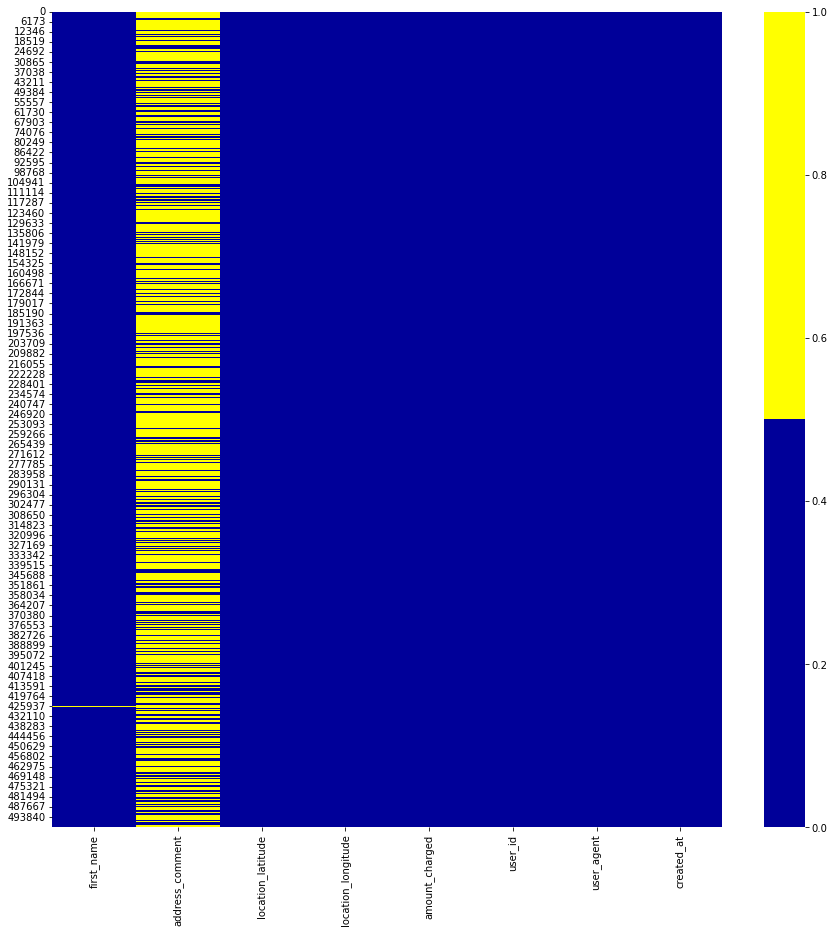

In [58]:
cols = df.columns 
colours = ['#000099', '#ffff00'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [59]:
df.duplicated().sum()

0

In [60]:
df

,first_name,address_comment,location_latitude,location_longitude,amount_charged,user_id,user_agent,created_at
0,Марина,NaN,55.817654,37.829648,1359,323129982,MagnitApp_Android/2.0.8,12/25/2021 22:00
1,Sergey B.,NaN,55.816030,37.808985,0,297849704,Mozilla/5.0 (iPhone; CPU iPhone OS 14_7_1 like...,9/30/2021 20:09
2,Елизавета,NaN,56.073574,37.365298,934,263040570,Mozilla/5.0 (iPhone; CPU iPhone OS 14_6 like M...,6/30/2021 20:43
3,Жанна Мкртчян,NaN,55.685777,37.544971,1104,304379733,ios(5.22.0),10/24/2021 15:35
4,Яна,"1573# код для входа во двор пешком, оставить з...",55.736684,37.687120,485,50560339,Mozilla/5.0 (Linux; Android 10; M2010J19CG Bui...,7/11/2021 10:39
...,...,...,...,...,...,...,...,...
499995,Сергей,NaN,55.818918,37.658652,383,19509504,Mozilla/5.0 (iPhone; CPU iPhone OS 14_6 like M...,7/5/2021 16:26
499996,Ivana,NaN,55.754508,37.605674,1999,23487800,Mozilla/5.0 (iPhone; CPU iPhone OS 14_4_2 like...,6/21/2021 16:40
499997,Ivana,NaN,55.754444,37.606268,1659,23487800,Mozilla/5.0 (iPhone; CPU iPhone OS 14_4_2 like...,6/29/2021 23:34
499998,Ivana,NaN,55.756741,37.605337,979,23487800,Mozilla/5.0 (iPhone; CPU iPhone OS 15_0_2 like...,11/2/2021 15:31


In [61]:
df.rename(columns = {'address_city':'Город', 
                     'address_street':'Улица', 
                     'address_house':'Дом', 
                     'amount_charged':'Цена', 
                     'created_at':'Дата',
                    'user_id':'id заказчика'}, inplace=True)
df

,first_name,address_comment,location_latitude,location_longitude,Цена,id заказчика,user_agent,Дата
0,Марина,NaN,55.817654,37.829648,1359,323129982,MagnitApp_Android/2.0.8,12/25/2021 22:00
1,Sergey B.,NaN,55.816030,37.808985,0,297849704,Mozilla/5.0 (iPhone; CPU iPhone OS 14_7_1 like...,9/30/2021 20:09
2,Елизавета,NaN,56.073574,37.365298,934,263040570,Mozilla/5.0 (iPhone; CPU iPhone OS 14_6 like M...,6/30/2021 20:43
3,Жанна Мкртчян,NaN,55.685777,37.544971,1104,304379733,ios(5.22.0),10/24/2021 15:35
4,Яна,"1573# код для входа во двор пешком, оставить з...",55.736684,37.687120,485,50560339,Mozilla/5.0 (Linux; Android 10; M2010J19CG Bui...,7/11/2021 10:39
...,...,...,...,...,...,...,...,...
499995,Сергей,NaN,55.818918,37.658652,383,19509504,Mozilla/5.0 (iPhone; CPU iPhone OS 14_6 like M...,7/5/2021 16:26
499996,Ivana,NaN,55.754508,37.605674,1999,23487800,Mozilla/5.0 (iPhone; CPU iPhone OS 14_4_2 like...,6/21/2021 16:40
499997,Ivana,NaN,55.754444,37.606268,1659,23487800,Mozilla/5.0 (iPhone; CPU iPhone OS 14_4_2 like...,6/29/2021 23:34
499998,Ivana,NaN,55.756741,37.605337,979,23487800,Mozilla/5.0 (iPhone; CPU iPhone OS 15_0_2 like...,11/2/2021 15:31


In [62]:
df['location_latitude'] = df['location_latitude'].round(4)
df['location_longitude'] = df['location_longitude'].round(4)

In [63]:
df['Дата'] = pd.to_datetime(df['Дата'])

In [64]:
df.set_index('id заказчика',  inplace = True)
df = df.reindex(columns=(['Дата'] +  list([a for a in df.columns if a !=  'Дата'] )))

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 323129982 to 307475568
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Дата                500000 non-null  datetime64[ns]
 1   first_name          499811 non-null  object        
 2   address_comment     150078 non-null  object        
 3   location_latitude   500000 non-null  float64       
 4   location_longitude  500000 non-null  float64       
 5   Цена                500000 non-null  int64         
 6   user_agent          500000 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 30.5+ MB


# Анализ

## Цена

In [66]:
df.sort_values(by = ['Цена'], ascending = False)

,Дата,first_name,address_comment,location_latitude,location_longitude,Цена,user_agent
id заказчика,,,,,,,
477429,2021-11-06 13:47:00,лев,NaN,55.7364,37.5990,65929,ios(5.23.1)
293469517,2021-11-06 21:58:00,Иосиф,NaN,55.7587,37.6404,50349,Mozilla/5.0 (Linux; Android 11; SM-A715F Build...
21806664,2021-09-12 16:21:00,Элла,"Склад «Деловые линии», ориентир ворота 11",55.8964,37.5211,49990,ios(5.19.1)
293469517,2021-11-05 21:03:00,Иосиф,Звонить +79952623110 !!!,55.7751,37.5500,49224,Mozilla/5.0 (iPad; CPU OS 14_6 like Mac OS X) ...
293469517,2021-10-29 17:13:00,Иосиф,+79952623110 - номер для связи,55.7471,37.5834,45939,Mozilla/5.0 (iPad; CPU OS 14_6 like Mac OS X) ...
...,...,...,...,...,...,...,...
313927183,2021-11-25 13:19:00,Игорь Цой,NaN,55.8104,37.5937,0,android (2.60.1)
6593751,2021-06-30 20:29:00,константин,NaN,55.8606,37.5929,0,Mozilla/5.0 (iPhone; CPU iPhone OS 14_6 like M...
1894879,2021-12-12 02:24:00,Роман Арюков,NaN,55.7829,37.5804,0,ios(5.27.0)


<AxesSubplot:ylabel='None'>

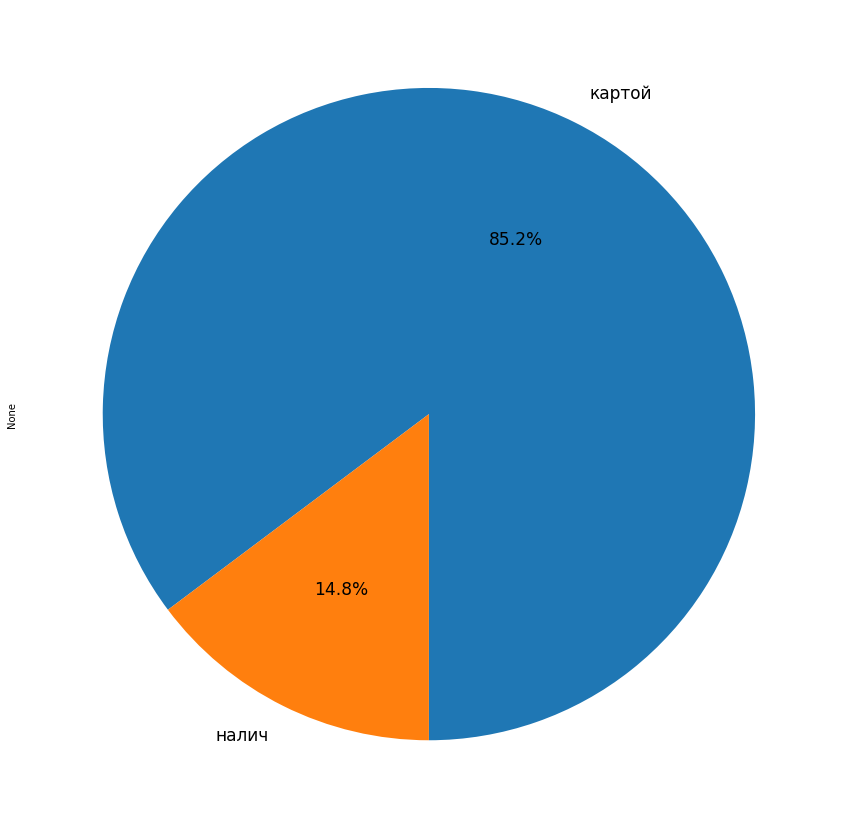

In [67]:
pd.Series(np.where(df['Цена']==0,'налич','картой')).value_counts().plot.pie(autopct='%1.1f%%', startangle=270, fontsize=17)

In [68]:
df['Цена'].round(-2).value_counts()[df['Цена'].round(-2).value_counts() > 100]

0       74406
700     36635
600     33624
800     32590
1000    28684
        ...  
5900      123
5800      119
6000      118
6100      104
6200      101
Name: Цена, Length: 63, dtype: int64

<AxesSubplot:>

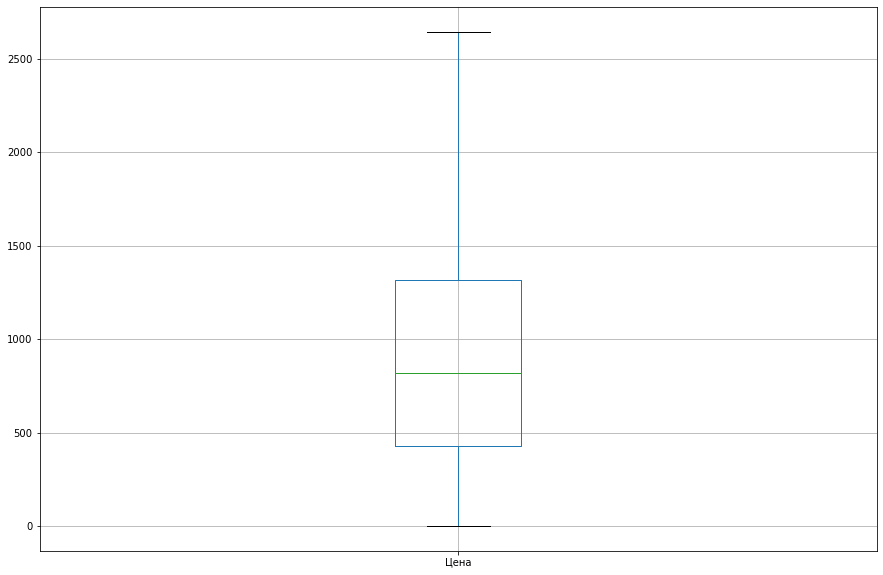

In [69]:
df.boxplot(column=['Цена'], figsize=(15, 10), showfliers=False)

In [70]:
df['Цена'].max()

65929

<AxesSubplot:>

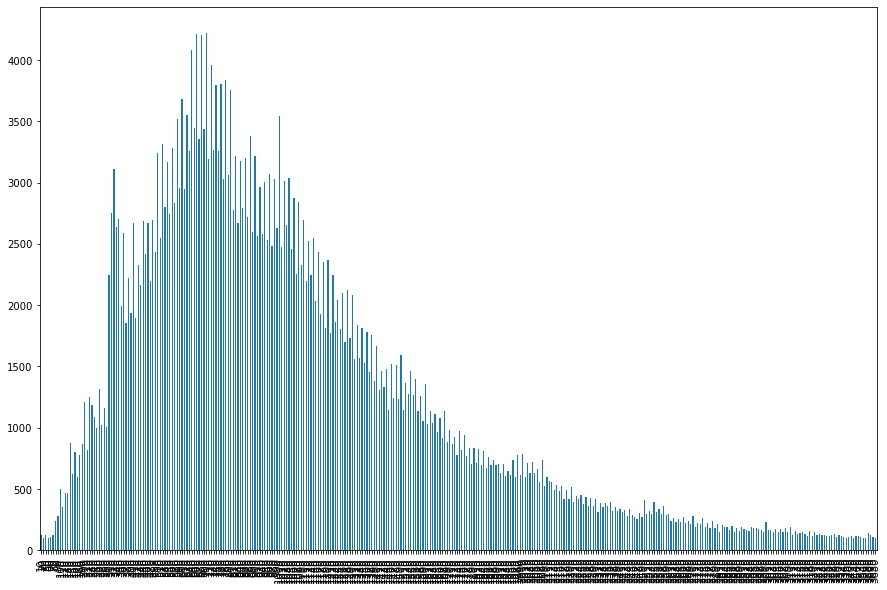

In [71]:
df['Цена'].round(-1).value_counts().sort_index(ascending=True)[df['Цена'].round(-1).value_counts() > 100][1:].plot(kind = 'bar', figsize=(15, 10))

In [72]:
df['Цена'].describe()

count    500000.000000
mean       1005.902446
std        1021.025799
min           0.000000
25%         431.000000
50%         817.000000
75%        1316.000000
max       65929.000000
Name: Цена, dtype: float64

<AxesSubplot:xlabel='Дата'>

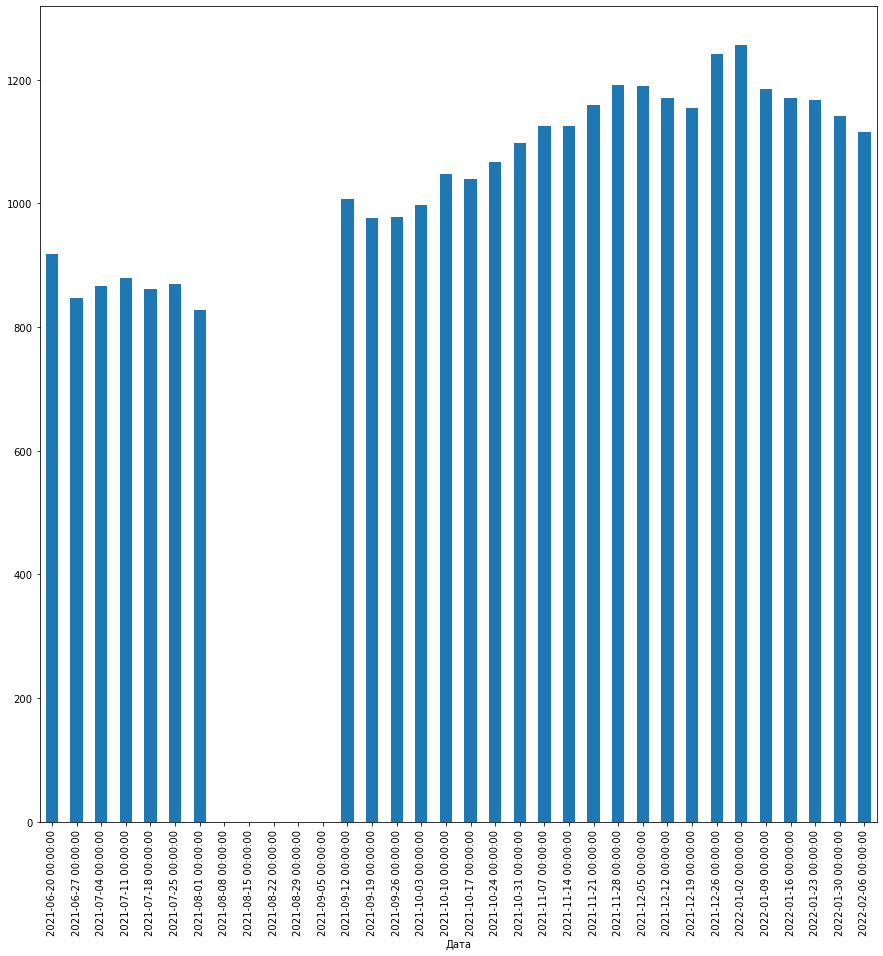

In [73]:
df.groupby([pd.Grouper(key='Дата', freq='w')])['Цена'].mean().plot(kind='bar')

In [74]:
df.groupby(df['Дата'].dt.strftime("%H"))['Цена'].agg({'size','mean'})

,mean,size
Дата,,
00,893.203724,19335
01,1040.082148,10128
02,1131.948149,6133
03,1105.664588,3849
04,1121.953468,2235
05,1149.864347,1408
06,1057.095595,1067
07,939.159628,1184
08,815.058060,2618


In [75]:
df.groupby(df['Дата'].dt.strftime("%A"))['Цена'].agg({'size','mean'})

,mean,size
Дата,,
Friday,1051.918391,66206
Monday,978.590549,67063
Saturday,1042.987468,88975
Sunday,1012.765239,86948
Thursday,1004.369939,62813
Tuesday,964.162551,64909
Wednesday,969.353866,63086


In [76]:
op = pd.pivot_table(df[df['Цена'] != 0], values = 'Цена',
               index = 'id заказчика',
               aggfunc=(len,sum, 'mean')).sort_values(by = ('len') , ascending=False)
op

,len,mean,sum
id заказчика,,,
293469517,59,6199.406780,365765
260062684,26,1140.038462,29641
8769566,26,3168.307692,82376
305586008,23,14.565217,335
1173942,23,1387.391304,31910
...,...,...,...
23939672,1,205.000000,205
23939848,1,450.000000,450
23940352,1,2019.000000,2019


In [77]:
df.loc[293469517]

,Дата,first_name,address_comment,location_latitude,location_longitude,Цена,user_agent
id заказчика,,,,,,,
293469517,2021-10-15 00:12:00,Иосиф,NaN,55.7531,37.5876,2099,Mozilla/5.0 (Linux; Android 11; SM-A715F Build...
293469517,2021-09-21 23:17:00,Иосиф,NaN,55.7674,37.6012,1380,Mozilla/5.0 (Linux; Android 11; SM-A715F Build...
293469517,2021-10-06 13:38:00,Иосиф,NaN,55.7682,37.6046,1910,Mozilla/5.0 (Linux; Android 11; SM-A715F Build...
293469517,2021-10-07 21:18:00,Иосиф,NaN,55.7769,37.5854,3079,Mozilla/5.0 (Linux; Android 11; SM-A715F Build...
293469517,2021-09-25 11:19:00,Иосиф,NaN,55.8239,37.4972,698,Mozilla/5.0 (Linux; Android 11; SM-A715F Build...
...,...,...,...,...,...,...,...
293469517,2021-11-09 15:14:00,Иосиф,Звонить на +79952623110,55.6308,37.6240,43909,Mozilla/5.0 (iPad; CPU OS 14_6 like Mac OS X) ...
293469517,2021-10-14 12:29:00,Иосиф,В отель марриот,55.7630,37.6173,1242,Mozilla/5.0 (Linux; Android 11; SM-A715F Build...
293469517,2021-11-09 19:23:00,Иосиф,NaN,55.7887,37.6102,8558,Mozilla/5.0 (Linux; Android 11; SM-A715F Build...


In [78]:
lat = df.loc[293469517]['location_latitude']
lon = df.loc[293469517]['location_longitude']

map = folium.Map(location=[55.751244, 37.618423], zoom_start = 10.5)

for lat, lon in zip(lat, lon):
    folium.CircleMarker(location=[lat, lon], radius = 9, color="red", fill_opacity = 0.9).add_to(map)

map

In [79]:
op[op['len'] > 10].sort_values(by = ('mean') , ascending=False)

,len,mean,sum
id заказчика,,,
264337678,13,7371.538462,95830
293469517,59,6199.406780,365765
229923350,15,4119.333333,61790
236938015,11,4067.272727,44740
921614,13,3337.230769,43384
...,...,...,...
16628838,18,165.722222,2983
42492087,17,158.235294,2690
3611110,17,93.882353,1596


In [80]:
lat = df.loc[264337678]['location_latitude']
lon = df.loc[264337678]['location_longitude']

map = folium.Map(location=[55.751244, 37.618423], zoom_start = 10.5)

for lat, lon in zip(lat, lon):
    folium.CircleMarker(location=[lat, lon], radius = 9, color="red", fill_opacity = 0.9).add_to(map)

map


In [81]:
jk = pd.pivot_table(df[df['Цена'] != 0], values = 'Цена',
               index = ['id заказчика', 'location_latitude','location_longitude'],
               aggfunc=(len,sum, 'mean')).sort_values(by = ('len') , ascending=False)
jk

,,,len,mean,sum
id заказчика,location_latitude,location_longitude,,,
307643743,55.7088,37.3821,18,33.944444,611
305586008,55.7088,37.3821,16,4.312500,69
311517903,55.7088,37.3821,9,34.000000,306
295435617,55.8275,37.4436,8,204.875000,1639
36964956,55.8477,37.3611,4,158.000000,632
...,...,...,...,...,...
8757077,55.8349,37.4893,1,308.000000,308
8756765,55.7215,37.6263,1,1037.000000,1037
8756252,55.8183,37.5021,1,2049.000000,2049


In [82]:
df.loc[305586008]

,Дата,first_name,address_comment,location_latitude,location_longitude,Цена,user_agent
id заказчика,,,,,,,
305586008,2021-11-03 22:01:00,Екатерина,NaN,55.7088,37.3821,5,android (2.59.0)
305586008,2021-10-31 17:53:00,Миша Смирнов,NaN,55.7088,37.3821,4,android (2.59.0)
305586008,2021-10-31 15:27:00,Светлана Гутякулова,NaN,55.7088,37.3821,4,android (2.59.0)
305586008,2021-11-14 01:26:00,Олеся,NaN,55.7088,37.3821,5,android (2.59.0)
305586008,2021-11-14 01:23:00,Юрий,NaN,55.7088,37.3821,5,android (2.59.0)
305586008,2021-11-15 22:40:00,Маруся,NaN,55.7088,37.3821,5,android (2.59.0)
305586008,2021-10-31 14:25:00,Vladimir,NaN,55.7088,37.3821,4,android (2.59.0)
305586008,2021-11-11 20:07:00,Владислав,NaN,55.7088,37.3821,4,android (2.59.0)
305586008,2022-01-07 21:17:00,Михаил,NaN,55.7094,37.4423,44,android (2.59.0)


In [83]:
lat = df.loc[305586008]['location_latitude']
lon = df.loc[305586008]['location_longitude']

map = folium.Map(location=[55.751244, 37.618423], zoom_start = 10.5)

for lat, lon in zip(lat, lon):
    folium.CircleMarker(location=[lat, lon], radius = 9, color="red", fill_opacity = 0.9).add_to(map)

map

In [149]:
russian_names = pd.read_csv("russian_names.csv", encoding='utf-8', sep = ';', on_bad_lines='skip')
russian_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51529 entries, 0 to 51528
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                51529 non-null  int64 
 1   Name              51529 non-null  object
 2   Sex               51529 non-null  object
 3   PeoplesCount      51529 non-null  int64 
 4   WhenPeoplesCount  51529 non-null  object
 5   Source            51529 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.4+ MB


In [147]:
qz

,Дата,first_name,address_comment,location_latitude,location_longitude,Цена,user_agent,name,Sex
0,2021-12-25 22:00:00,Марина,NaN,55.8177,37.8296,1359,MagnitApp_Android/2.0.8,NaN,NaN
1,2021-09-30 20:09:00,Sergey B.,NaN,55.8160,37.8090,0,Mozilla/5.0 (iPhone; CPU iPhone OS 14_7_1 like...,NaN,NaN
2,2021-06-30 20:43:00,Елизавета,NaN,56.0736,37.3653,934,Mozilla/5.0 (iPhone; CPU iPhone OS 14_6 like M...,NaN,NaN
3,2021-10-24 15:35:00,Жанна Мкртчян,NaN,55.6858,37.5450,1104,ios(5.22.0),NaN,NaN
4,2021-07-11 10:39:00,Яна,"1573# код для входа во двор пешком, оставить з...",55.7367,37.6871,485,Mozilla/5.0 (Linux; Android 10; M2010J19CG Bui...,NaN,NaN
...,...,...,...,...,...,...,...,...,...
511199,2021-07-05 16:26:00,Сергей,NaN,55.8189,37.6587,383,Mozilla/5.0 (iPhone; CPU iPhone OS 14_6 like M...,NaN,NaN
511200,2021-06-21 16:40:00,Ivana,NaN,55.7545,37.6057,1999,Mozilla/5.0 (iPhone; CPU iPhone OS 14_4_2 like...,Ivana,Ж
511201,2021-06-29 23:34:00,Ivana,NaN,55.7544,37.6063,1659,Mozilla/5.0 (iPhone; CPU iPhone OS 14_4_2 like...,Ivana,Ж
511202,2021-11-02 15:31:00,Ivana,NaN,55.7567,37.6053,979,Mozilla/5.0 (iPhone; CPU iPhone OS 15_0_2 like...,NaN,NaN


<AxesSubplot:ylabel='Sex'>

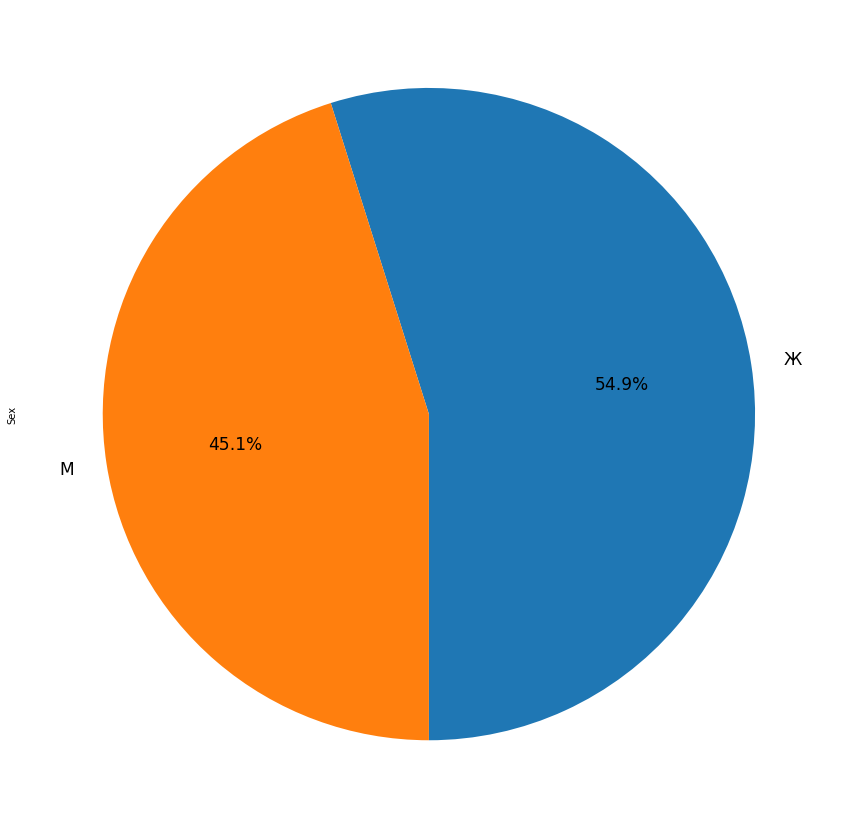

In [156]:
qz = df.merge(russian_names[['Name','Sex']], how='left',  left_on='first_name', right_on='Name')
qz['Sex'].value_counts().plot.pie(autopct='%1.1f%%', startangle=270, fontsize=17)

In [184]:
qz.pivot_table('Цена', index =[qz['Дата'].dt.strftime("%H"), 'Sex'], aggfunc=['count'])

count
           Цена
Дата Sex       
00   Ж     4822
     М     5498
01   Ж     2294
     М     2948
02   Ж     1282
     М     1931
03   Ж      730
     М     1228
04   Ж      448
     М      722
05   Ж      289
     М      423
06   Ж      227
     М      316
07   Ж      288
     М      357
08   Ж      764
     М      679
09   Ж     2053
     М     1356
10   Ж     4090
     М     2573
11   Ж     6437
     М     3984
12   Ж     8493
     М     5568
13   Ж    10610
     М     7281
14   Ж    11123
     М     8326
15   Ж    11328
     М     8449
16   Ж    10893
     М     8528
17   Ж    10837
     М     8183
18   Ж    10965
     М     8377
19   Ж    11436
     М     9322
20   Ж    11731
     М    10212
21   Ж    11157
     М     9838
22   Ж     9289
     М     8818
23   Ж     6912
     М     7254

In [88]:
dfc = df.groupby(['location_latitude', 'location_longitude']).size()
dfc = dfc.reset_index(drop=False)
dfc.columns = ['location_latitude', 'location_longitude', 'T']

In [89]:
dfc = dfc.sort_values(by='T', ascending = False)[:300]
dfc

,location_latitude,location_longitude,T
188249,55.7908,37.5232,213
136939,55.7471,37.5391,165
186540,55.7894,37.5368,159
189388,55.7917,37.7486,134
182269,55.7851,37.6240,131
...,...,...,...
56166,55.6635,37.6168,31
151778,55.7592,37.4092,31
43563,55.6471,37.6736,31
159107,55.7650,37.6398,31


In [90]:
lat = dfc['location_latitude']
lon = dfc['location_longitude']
elevation = dfc['T']


def color_change(elev):
    if(elev < 50):
        return('green')
    elif(50 <= elev <100):
        return('orange')
    else:
        return('red')

#Create base map
map = folium.Map(location=[55.751244, 37.618423], zoom_start = 10.5)


#Plot Markers and add to 'marker_cluster'
for lat, lon, elevation in zip(lat, lon, elevation):
    folium.CircleMarker(location=[lat, lon], radius = 9, popup=str(elevation)+" m", fill_color=color_change(elevation), color="gray", fill_opacity = 0.9).add_to(map)

#Save the map
map

In [91]:
bn[(bn['Город'] != 'москва')]

NameError: name 'bn' is not defined

In [ ]:
df.info()

In [ ]:
df['Цена'].value_counts(normalize=True, bins = 500).sort_index(ascending=True)

In [ ]:
df[(df['Цена'] >= 10000)]

In [ ]:
pd.pivot_table(df, 'Цена', 'id заказчика')

In [ ]:
bn['Цена'].sum()

In [ ]:
df.groupby(pd.Grouper(key="Дата", freq="W")).agg({'Цена':['sum','mean']})

In [ ]:
plt.plot(ryy[3])

In [ ]:
adult_names = bn.loc[bn['Цена'] > 1000, "Имя"]
adult_names

In [ ]:
w = bn[bn['Цена'] >= 10000]
p = w[["Имя", "Цена"]].groupby("Имя").mean()
p

In [ ]:
w.plot(kind='barh', x="Имя", y="Цена")[:100]

In [ ]:
we = df.groupby(['id заказчика']).size().reset_index(name='count')
rt = we[(we['count'] >= 20)]
rt

In [ ]:
iii = pd.pivot_table(df, index=["id заказчика"],
               values=["Цена"], aggfunc=[np.mean, len], fill_value=0)
iii

In [ ]:
hgg = beznull.sort_values(by='created_at', ascending=True)[:300]
hgg

In [ ]:
hgg.plot(kind='bar', x="created_at", y="amount_charged", figsize=(15, 10))

In [ ]:
ryy.plot(kind='bar', y="amount_charged", figsize=(15, 10))

In [ ]:
beznull.dtypes

In [ ]:
ax = iii.plot(kind='barh', stacked=True)
ax

In [ ]:
cut_labels_4 = ['0-500', '500-1000', '1000-2000', '2000+']
cut_bins = [0, 500, 1000, 2000, 200000]
beznull['amount_charged12'] = pd.cut(beznull['amount_charged'],
                       bins=cut_bins,
                       labels=cut_labels_4)
beznull.head()



In [ ]:
beznull['amount_charged12'].value_counts()

In [ ]:
beznull['amount_charged12'].value_counts().plot(kind='bar', y="amount_charged12", figsize=(15, 10))

In [ ]:
rff = pd.cut(beznull['amount_charged'],
       bins=np.linspace(0, 3000, 101)).value_counts()
rff.dtypes

In [ ]:
rff.value_counts().plot(kind='bar', y="amount_charged12", figsize=(15, 10))

In [ ]:
beznull['amount_charged'] = round(beznull['amount_charged'], -2)

In [ ]:
edd = beznull.groupby(['amount_charged']).size().reset_index(name='count')
edd = edd[(edd['count'] >= 20)]

In [ ]:
edd.plot(kind='bar', y="count", figsize=(15, 10))


In [ ]:
import fiona

In [ ]:
gdalinfo --version